In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from imblearn.over_sampling import SVMSMOTE

matplotlib.style.use('fivethirtyeight')
np.random.seed(113)

In [2]:
# loading csv file
names=['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status']
df = pd.read_csv('../datasets/breast-cancer-wisconsin.data', names=names, na_values='?')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sample      699 non-null    int64  
 1   thickness   699 non-null    int64  
 2   size        699 non-null    int64  
 3   shape       699 non-null    int64  
 4   adhesion    699 non-null    int64  
 5   epithelial  699 non-null    int64  
 6   nuclei      683 non-null    float64
 7   chromatin   699 non-null    int64  
 8   nucleoli    699 non-null    int64  
 9   mitoses     699 non-null    int64  
 10  status      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [4]:
print(df.isnull().sum())
df.head(10)

sample         0
thickness      0
size           0
shape          0
adhesion       0
epithelial     0
nuclei        16
chromatin      0
nucleoli       0
mitoses        0
status         0
dtype: int64


,sample,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,status
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [5]:
# cleaning
df.fillna(df.mean(), inplace=True)
# changing NaN values for mean values
df.reset_index()

print(df.isna().sum())

sample        0
thickness     0
size          0
shape         0
adhesion      0
epithelial    0
nuclei        0
chromatin     0
nucleoli      0
mitoses       0
status        0
dtype: int64


In [6]:
df['status'].value_counts()

2    458
4    241
Name: status, dtype: int64

In [7]:
y = df['status']
#y[y==2] = 0; y[y==4] = 1
# if you want to keep classes 2 and 4 also change the Perceptron activation

In [8]:
X = df.drop(columns=['status', 'sample'])
# 'status' goes for labels and number of 'sample' isn't important

print(X.dtypes)
X.head(10)

thickness       int64
size            int64
shape           int64
adhesion        int64
epithelial      int64
nuclei        float64
chromatin       int64
nucleoli        int64
mitoses         int64
dtype: object


,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
5,8,10,10,8,7,10.0,9,7,1
6,1,1,1,1,2,10.0,3,1,1
7,2,1,2,1,2,1.0,3,1,1
8,2,1,1,1,2,1.0,1,1,5
9,4,2,1,1,2,1.0,2,1,1


In [9]:
oversample = SVMSMOTE(sampling_strategy=.65)
X, y = oversample.fit_resample(X, y)
y.value_counts()

2    458
4    297
Name: status, dtype: int64

In [10]:
class Perceptron:
    """Perceptron with mini-batch training"""
    
    def __init__(self, n_dim, learning_rate):
        self.weights = np.random.randn(n_dim) * 0.01
        self.bias    = 0
        self.n_dim   = n_dim
        self.lr = learning_rate
        
    def activation(self, x):
        return np.where(x>=0, 4, 2)
    
    def perceptronComputing(self, X):
        z = np.dot(X, self.weights) + self.bias
        outputs = self.activation(z)
        return outputs
    
    def train(self, X, y, epochs=1000, batch_size=32, lr_decay=0.1, verbose=True):
        n_samples = X.shape[0]
        n_batches = n_samples // batch_size
        loss_history = []
        
        for i in range(epochs):
            # Shuffle the data and split into batches
            indices = np.random.permutation(n_samples)
            X_batches = np.array_split(X[indices], n_batches)
            y_batches = np.array_split(y[indices], n_batches)
            
            # Train on each batch
            for X_batch, y_batch in zip(X_batches, y_batches):
                y_preds = self.perceptronComputing(X_batch)
                error = self.lr * (y_batch - y_preds)
                update = np.dot(error, X_batch)
                self.bias += np.sum(error)
                self.weights += update
                
            # Compute the loss
            y_preds = self.perceptronComputing(X)
            loss = np.mean(np.abs(y_preds - y))
            loss_history.append(loss)
            
            # Update the learning rate
            self.lr *= (1.0 / (1.0 + lr_decay * i))
            
            # Print progress
            if verbose and (i % 20 == 0):
                print(f"Epoch {i}: Loss = {loss:.4f}")
                
        return self.bias, self.weights, loss_history
    
    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        preds = self.activation(z)
        return preds

#useful: https://www.python-engineer.com/courses/mlfromscratch/06_perceptron/
#improved with help of ChatGPT

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# preprocessing
preprocesser = StandardScaler()
X = preprocesser.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [14]:
n_dim = X.shape[1]
perceptron = Perceptron(n_dim, 0.0005)
print("Perceptron weights before training:\n", perceptron.weights)

Perceptron weights before training:
 [ 0.00871933 -0.00669205 -0.00547631 -0.01647812 -0.00564932  0.00933079
  0.00963772  0.00330515 -0.02217931]


In [15]:
num_epochs, batch_s = 200, 64
print("Perceptron bias and weights after training:")
bias, weights, loss_history = perceptron.train(X_train, y_train.to_numpy(), num_epochs, batch_s, 0.01)
bias, weights

Perceptron bias and weights after training:
Epoch 0: Loss = 0.1092
Epoch 20: Loss = 0.0842
Epoch 40: Loss = 0.0936
Epoch 60: Loss = 0.0905
Epoch 80: Loss = 0.0905
Epoch 100: Loss = 0.0905
Epoch 120: Loss = 0.0905
Epoch 140: Loss = 0.0905
Epoch 160: Loss = 0.0905
Epoch 180: Loss = 0.0905


(0.00015074400045824357,
 array([ 3.85440044e-04,  1.88235368e-04,  1.89172163e-04,  2.40883555e-04,
        -1.69079060e-04,  4.26625616e-04,  1.61423550e-04,  9.37434822e-05,
         3.27109347e-04]))

In [16]:
y_pred = perceptron.predict(X_test)

In [17]:
def get_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / y_true.shape[0]

In [18]:
accuracy = get_accuracy(y_test, y_pred)
print( f'Accuracy: {100 * accuracy :.4f}%' )

Accuracy: 99.1228%


In [19]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

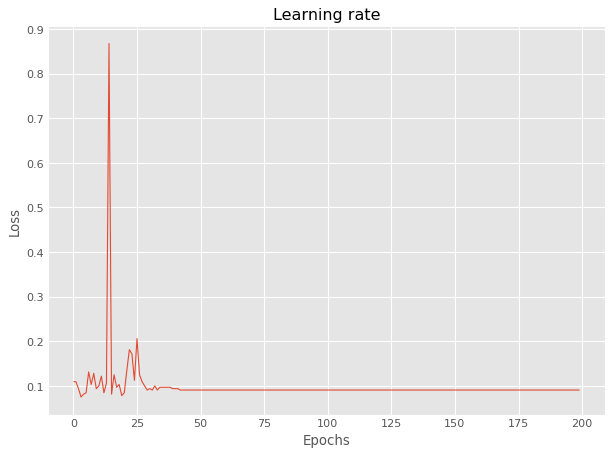

In [20]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(range(num_epochs), loss_history, linewidth=1)
plt.title('Learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
eigenvalues

array([5.6671362 , 0.79686006])

In [23]:
print('How much variance is explained by each principal component:')
pca.explained_variance_ratio_

How much variance is explained by each principal component:


array([0.62884778, 0.08842274])

In [24]:
weights_pca = pca.transform(weights.reshape(1, -1))
weights_pca

array([[5.88951460e-04, 2.84856369e-05]])

In [25]:
def plot_decision_boundary(X, weights):
    h = 0.01 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid( np.arange(x_min, x_max, h), np.arange(y_min, y_max, h) )
    
    Z = np.dot( np.c_[xx.ravel(), yy.ravel()] , weights.T )
    Z = np.where( Z >= 0, 1, 0 )
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

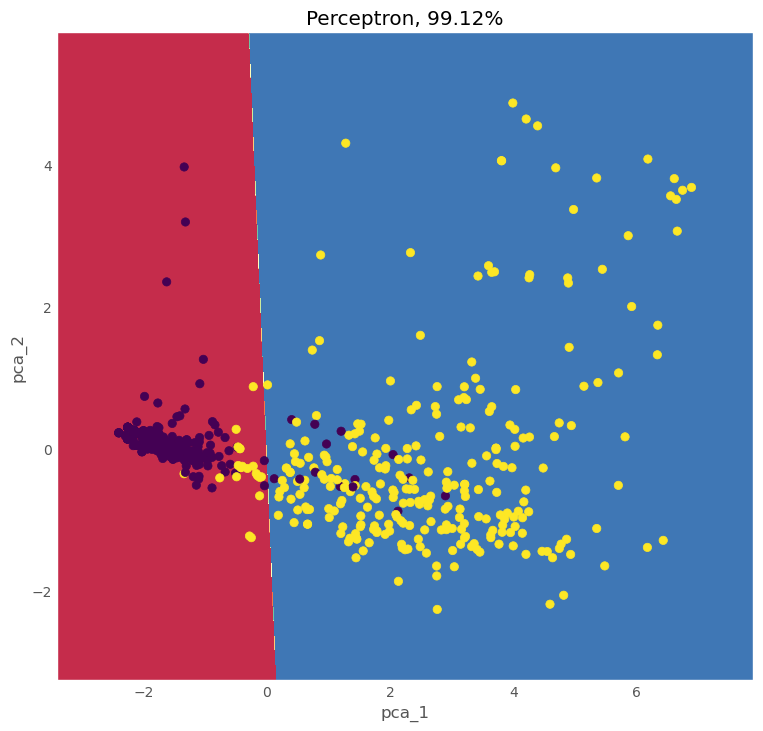

In [26]:
plt.figure(figsize=(8, 8))
plot_decision_boundary(X_pca, weights_pca)
plt.scatter( X_pca[:,0], X_pca[:,1], c=y )
plt.title('Perceptron, {:.2f}%'.format(100 * accuracy))
plt.xlabel('pca_1')
plt.ylabel('pca_2')

plt.show()

In [27]:
import seaborn as sn
from sklearn import metrics

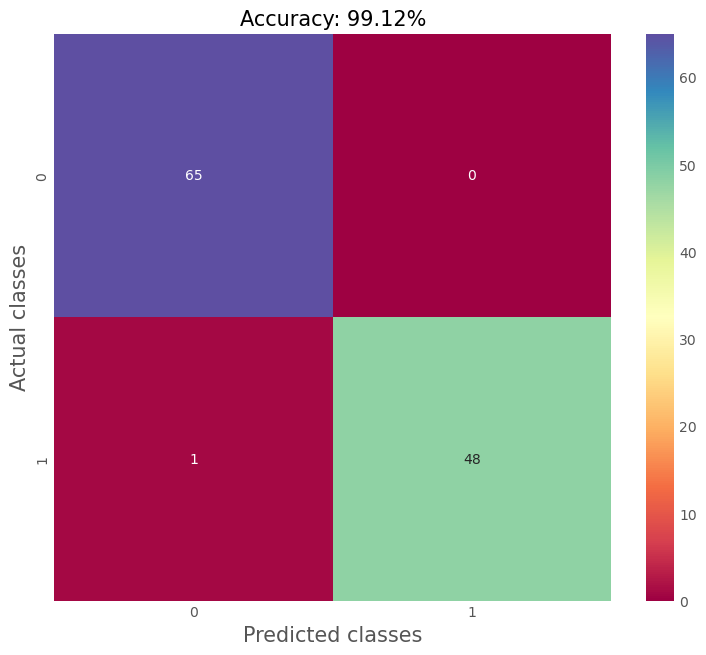

In [28]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 7))
sn.heatmap(cm, annot=True, cmap=plt.cm.Spectral)
plt.ylabel('Actual classes', size=15)
plt.xlabel('Predicted classes', size=15)
plt.title(f'Accuracy: {accuracy*100:.2f}%', size=15)
plt.show()